In [70]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("dark")
sns.set(rc={'figure.figsize':(13,9)})

## Habits

In [71]:
df = pd.read_csv("../data/health.csv")
df['timestamp'] = df['timestamp'].astype('datetime64')
df['day#'] = df['timestamp'].dt.dayofyear  - 94
habits = set(df['habit'])

In [72]:
df

,timestamp,habit,value,display,notes,day#
0,2020-04-03 06:34:07,Exercise,15,15 minutes,NaN,0
1,2020-04-03 06:34:07,Pets,15,15 minutes,NaN,0
2,2020-04-03 06:34:07,Meditation,16,16-20,NaN,0
3,2020-04-03 06:34:07,Hygiene,-1,yes,NaN,0
4,2020-04-03 06:34:07,Outdoors,15,15 minutes,NaN,0
...,...,...,...,...,...,...
265,2020-05-11 04:58:31,Sleep,5,5 hours,NaN,38
266,2020-05-11 04:58:31,Exercise,30,30 minutes,NaN,38
267,2020-05-11 04:58:31,Hygiene,-1,yes,NaN,38
268,2020-05-11 04:58:31,Meds,0,1,NaN,38


In [73]:
important_columns = ['Exercise','Meditation','Pets','Sleep','Hobbies']
important_habits_df = df.loc[df['habit'].isin(important_columns)]

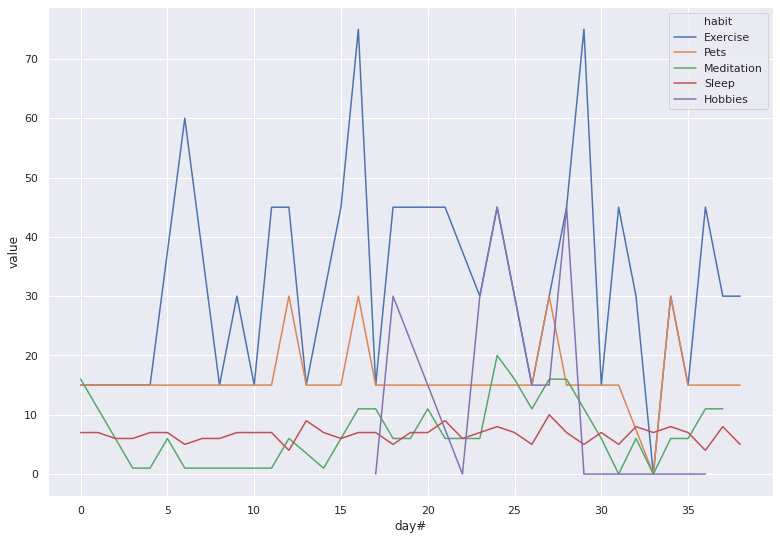

In [74]:
sns.lineplot(x='day#',
             y='value', hue="habit", data=important_habits_df)

In [75]:
def plot_habit(habit):
    habit_df = df.loc[df["habit"] == habit]
    sns.lineplot(x="day#", 
                 y="value",
                 data=habit_df).set(title=habit)

In [76]:
habits

{'Exercise',
 'Hobbies',
 'Hygiene',
 'Meditation',
 'Meds',
 'Outdoors',
 'Pets',
 'Sleep',
 'Thought Dairy'}

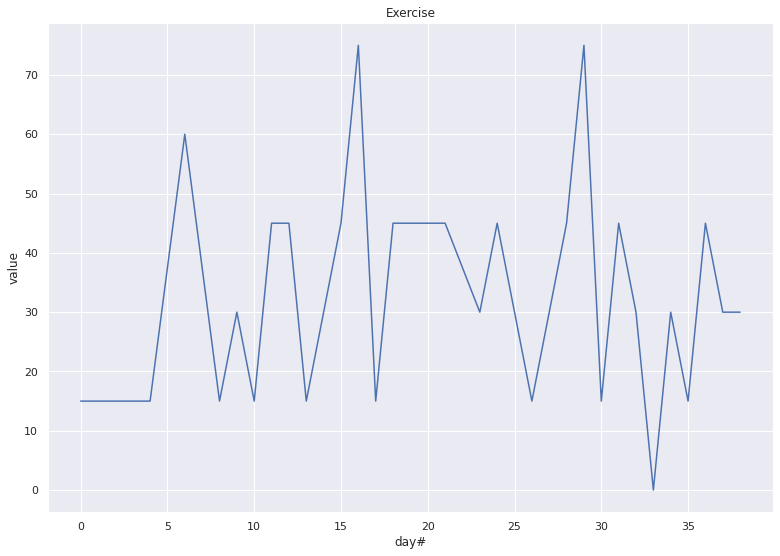

In [77]:
plot_habit("Exercise")

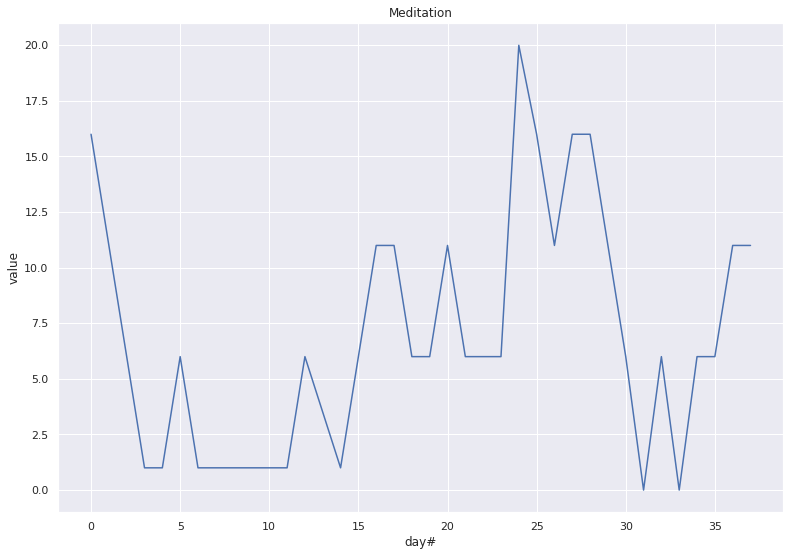

In [78]:
plot_habit("Meditation")

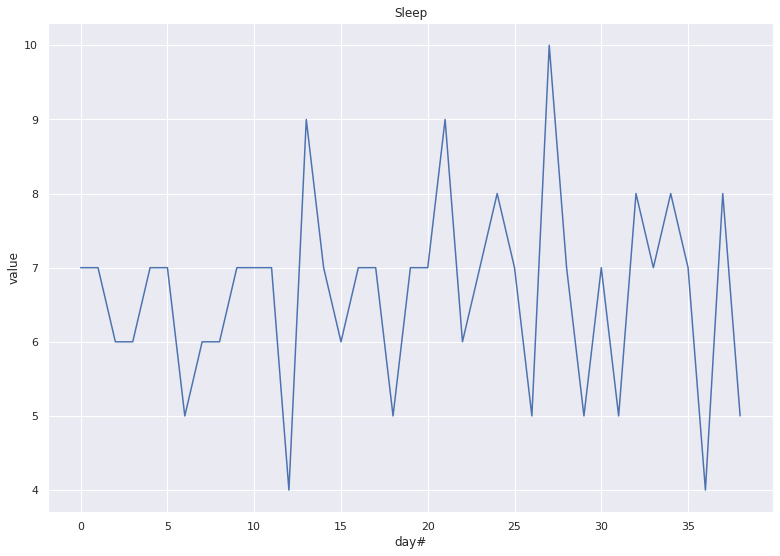

In [79]:
plot_habit("Sleep")

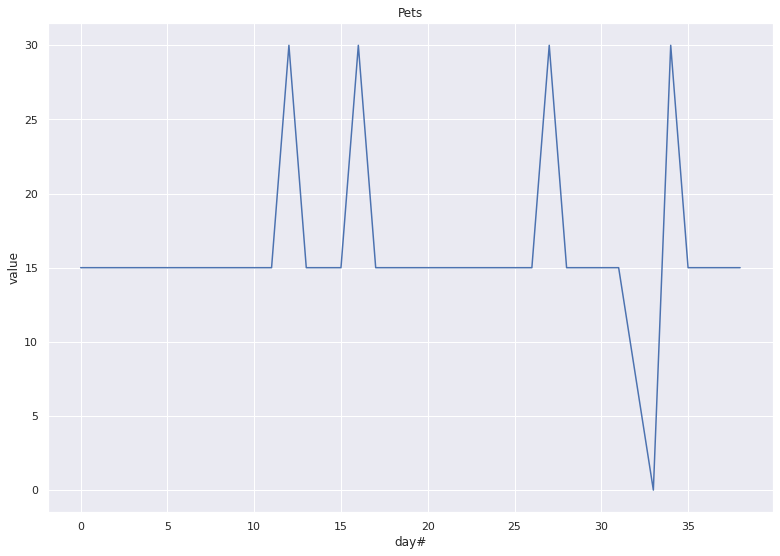

In [80]:
plot_habit("Pets")

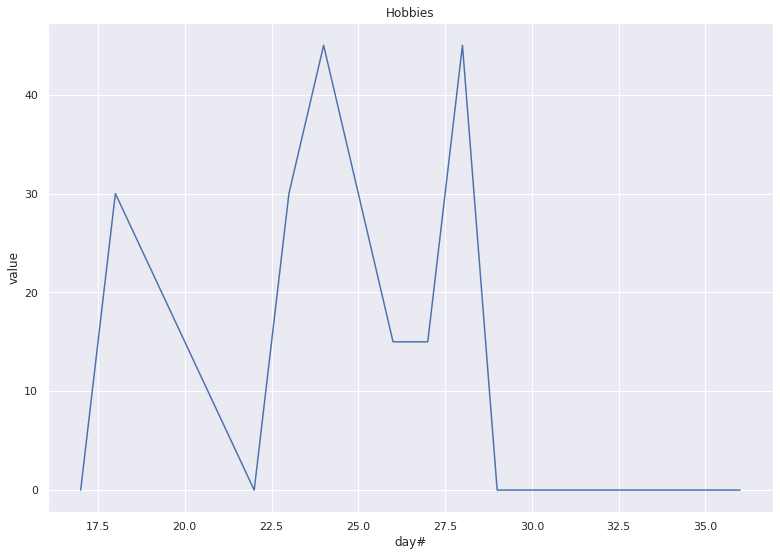

In [81]:
plot_habit("Hobbies")

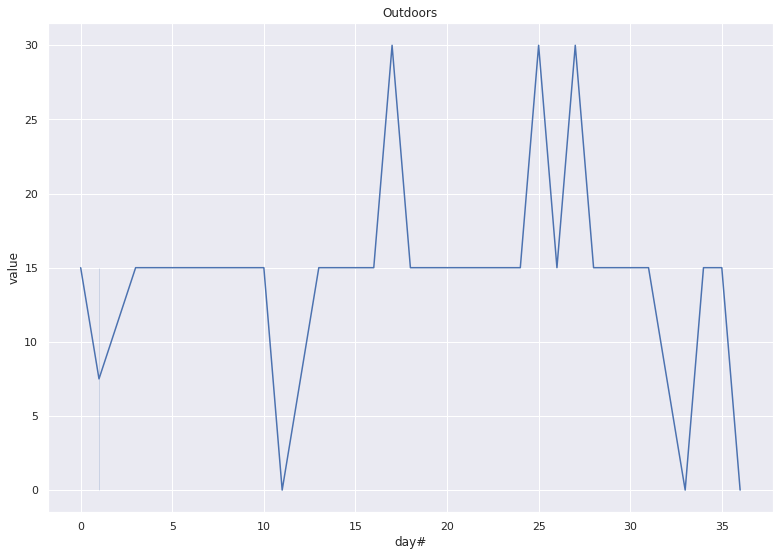

In [82]:
plot_habit("Outdoors")

# Activity

In [83]:
df = pd.read_csv("../data/activities.csv")
df['timestamp'] = df['timestamp'].astype('datetime64')
df['day#'] = df['timestamp'].dt.dayofyear  - 94

In [84]:
df

,timestamp,activity,category,day#
0,2020-04-05 06:37:25,journal,thoughts,2
1,2020-04-05 06:39:10,created goal,goals,2
2,2020-04-05 06:39:49,created goal,goals,2
3,2020-04-05 06:40:05,created goal,goals,2
4,2020-04-05 06:41:06,created goal,goals,2
...,...,...,...,...
92,2020-05-09 16:04:18,gratitude journal,thoughts,36
93,2020-05-09 16:05:39,positivity journal,thoughts,36
94,2020-05-10 16:06:03,journal,thoughts,37
95,2020-05-10 16:11:23,journal,thoughts,37


# mood

In [85]:
from wordcloud import WordCloud

In [86]:
df = pd.read_csv("../data/mood.csv")
df['timestamp'] = df['timestamp'].astype('datetime64')
df['display'] = df['display'].astype('category')
df['day#'] = df['timestamp'].dt.dayofyear  - 94

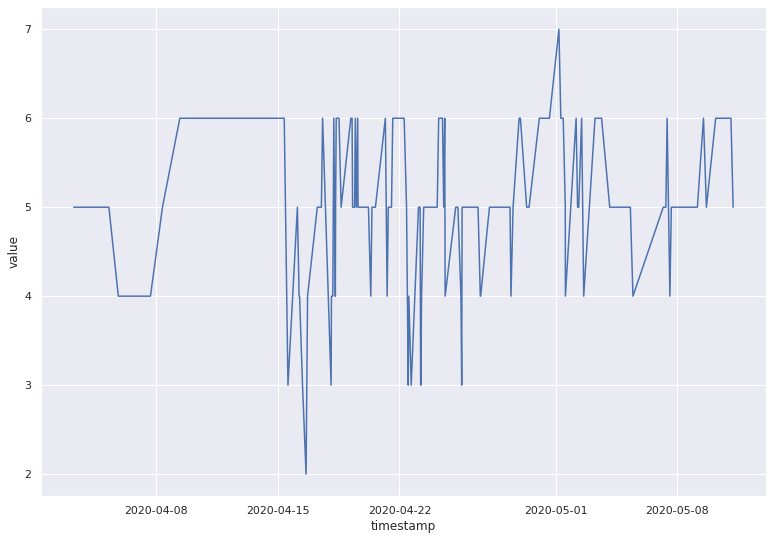

In [69]:
sns.lineplot(x='timestamp', y='value', data=df)

In [19]:
all_feels = []
for feelings in df['feelings']:
    if isinstance(feelings, str):
        for feeling in feelings.split(";"):
            if feeling is not ";":
                all_feels.append(feeling)

(-0.5, 399.5, 199.5, -0.5)

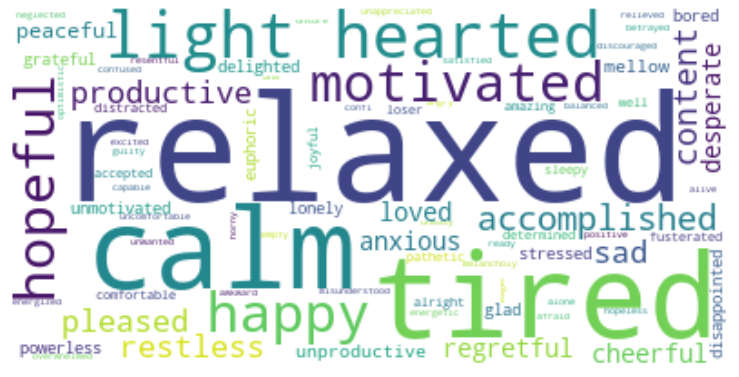

In [32]:
text = " ".join(all_feels)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
